## PAN card Tampering Detection

The purpose of this project is to detect tampering of PAN card using computer vision. This project will help different organization in detecting whether the ID i.e the PAN card provided to them by their employees or customers or annyone is orginal or not

### For this project we will calculate structural similarity of original PAN card and the PAN card uploaded by User.

In [ ]:
# import the necessary packages
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests




In [ ]:
# !mkdir pan_card_tampering
# !mkdir pan_card_tampering/image

### Loading orginal and user provided images

In [ ]:
original = Image.open("/content/drive/MyDrive/pan-card/IMG1/Gemini_Generated_Image_czyso2czyso2czys.png")
tampered = Image.open("/content/drive/MyDrive/pan-card/IMG2/Gemini_Generated_Image_baipy4baipy4baip.png")

In [ ]:
# # Open image and display
# original = Image.open(requests.get("/content/drive/MyDrive/pan-card/image/Gemini_Generated_Image_3r8ou23r8ou23r8o.png", stream=True).raw)
# tampered = Image.open(requests.get("/content/drive/MyDrive/pan-card/uploaded/Gemini_Generated_Image_4u29xg4u29xg4u29.png", stream=True).raw)

In [ ]:
# check the files format and it is size
print("original size : ", original.size )
print("tampered size : ", tampered.size)
print("original format : ", original.format)
print("tampered format : ", tampered.format)

original size :  (1024, 1024)
tampered size :  (1024, 1024)
original format :  PNG
tampered format :  PNG


### converting the format of tampered image similar to image

In [ ]:
# resize Image
original = original.resize((250, 160))
print(original.size)
original.save('/content/drive/MyDrive/pan-card/IMG1/original.png') # save image
tampered = tampered.resize((250, 160))
print(tampered.size)
tampered.save('/content/drive/MyDrive/pan-card/IMG2/tampered.png') # save image

(250, 160)
(250, 160)


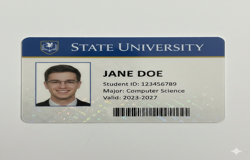

In [ ]:
# Display original image
original

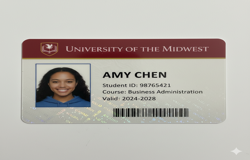

In [ ]:
# Display tampered image
tampered

### Now let compare the images
To do that first we need to
1. load our image using opencv
2. convert thes images to grayscales ( we need to conert the image into grayscales because grayscales make the image proccessing more easier)
3. compute the structural Similarity Index which will help us find the similarity and the difference between this 2 ID
4. for more proove we will  
 * calculate the threshold and contour
 * create a rectancle contour around the ID which will help see the difference  


In [ ]:
# load the two images using opencv(cv2imread)
original = cv2.imread('/content/drive/MyDrive/pan-card/IMG1/original.png')
tampered = cv2.imread('/content/drive/MyDrive/pan-card/IMG2/tampered.png')

In [ ]:
# let's convert our image to grayscale
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

In [ ]:
# compute the structural Similarity Index (SSIM) between the two images, ensuring that the difference image is returned
(score, diff) = structural_similarity(original_gray, tampered_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.7470641475730001


In [ ]:
# Calculating threshold and contours
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [ ]:
#print("cnts :", cnts)

In [ ]:
# Create a rectangle
# loop over the contours
for c in cnts:
    # compute the bounding box of the contour and then draw the
    # bounding box on both input images to represent where the two
    # images differ
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(tampered, (x, y), (x + w, y + h), (0, 0, 255), 2)

original Format Image 


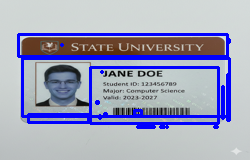

In [ ]:
# Display original image with contour
print("original Format Image ")
Image.fromarray(original)

tampered Format Image 


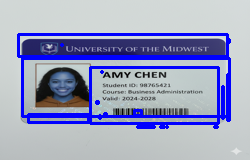

In [ ]:
# Display tamperes image with contour
print("tampered Format Image ")
Image.fromarray(tampered)

Difference Image 


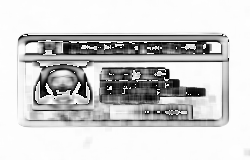

In [ ]:
# Display diferrence image with black
print("Difference Image ")
Image.fromarray(diff)

Threshold Image 


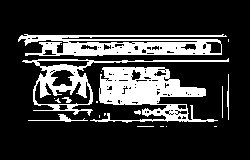

In [ ]:
# Display threshold image with white
print("Threshold Image ")
Image.fromarray(thresh)

## Summary
Finding the structural Similarity which was 74.70 and calculating the threshold and contour help us conclude that these tWo ID are little bit simillar